In [30]:
import pandas as pd

data = pd.read_csv(r'/home/jonathan/Documents/IDATT2502/IDATT2502 - Machine Learning/A7/agaricus-lepiota.data')
data.pop('edibility')
data.head()
dummies = pd.get_dummies(data)

Task 1:
* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).

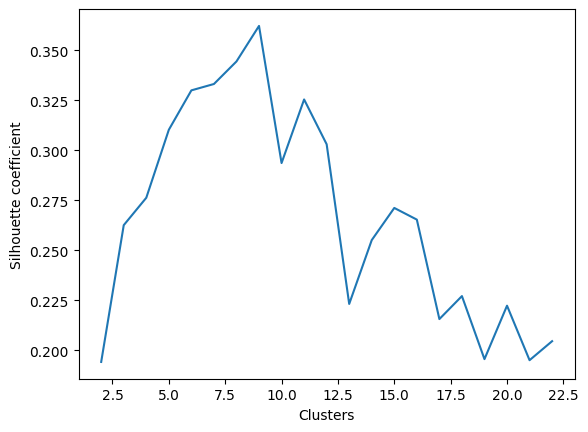

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=23)
df_pca = pca.fit_transform(dummies)
c = range(2, 23)
sc = []

for n in c:
    kmeans_pca = KMeans(n_clusters=n, init= 'k-means++')
    kmeans_pca.fit(df_pca)
    sc.append(metrics.silhouette_score(df_pca, kmeans_pca.labels_, metric='euclidean'))

plt.figure()
plt.xlabel('Clusters')
plt.ylabel('Silhouette coefficient')
plt.plot(c, sc)
plt.show()

It looks like the optimal number of clusters for the dataset is around 8.

Task 2:
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).

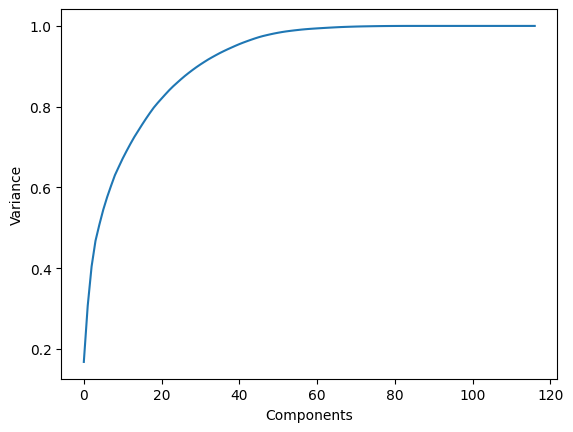

In [32]:
pca = PCA()
pca.fit(dummies)

plt.plot(range(0, 117), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

Task 3:
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [35]:
pca_transform = pca.fit_transform(dummies)

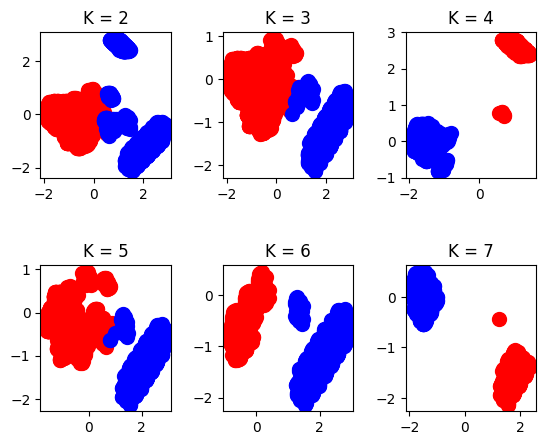

In [36]:
figure, axs = plt.subplots(2,3)
plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.6, wspace=0.4)

for i in range(1,7):
    k = i+1
    x = int((i-1)/3)
    y = ((i-1)%3)
    
    kmeans = KMeans(n_clusters=k, init= 'k-means++')
    Ypreds = kmeans.fit_predict(pca_transform)

    axs[x, y].title.set_text(f'K = {k}')
    axs[x, y].scatter(pca_transform[Ypreds == 0, 0], pca_transform[Ypreds == 0, 1], s = 100, c = 'red', label = 'edible')
    axs[x, y].scatter(pca_transform[Ypreds == 1, 0], pca_transform[Ypreds == 1, 1], s = 100, c = 'blue', label = 'poisonous')

plt.show()